In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import seaborn as sns
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
dataset_dir = os.path.join(os.getcwd(), "CIFAKE")

img_height = 32
img_width = 32
batch_size = 500

# Load training and validation data
train, val = keras.utils.image_dataset_from_directory(
  os.path.join(dataset_dir, "train"),
  validation_split=0.2,
  subset="both",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.
Using 20000 files for validation.


In [3]:
# Load test data
test = keras.utils.image_dataset_from_directory(
  os.path.join(dataset_dir, "test"),
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 20000 files belonging to 2 classes.


In [4]:
classes = train.class_names
classes

['FAKE', 'REAL']

In [5]:
# Build model
keras.backend.clear_session()

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Flatten(),
    layers.Dense(units=1, use_bias=True, activation="sigmoid")])

In [6]:
# Compile model
model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1)                 3073      
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train model
epochs = 4

history = model.fit(
  train,
  validation_data=val,
  epochs=epochs,
  verbose=1)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/4
160/160 [==============================] - 26s 153ms/step - loss: 0.6577 - accuracy: 0.6048 - precision: 0.6003 - recall: 0.6264 - val_loss: 0.6316 - val_accuracy: 0.6414 - val_precision: 0.6323 - val_recall: 0.6783
Epoch 2/4
160/160 [==============================] - 11s 65ms/step - loss: 0.6326 - accuracy: 0.6400 - precision: 0.6356 - recall: 0.6557 - val_loss: 0.6230 - val_accuracy: 0.6571 - val_precision: 0.6380 - val_recall: 0.7284
Epoch 3/4
160/160 [==============================] - 11s 64ms/step - loss: 0.6221 - accuracy: 0.6541 - precision: 0.6488 - recall: 0.6711 - val_loss: 0.6181 - val_accuracy: 0.6579 - val_precision: 0.6548 - val_recall: 0.6702
Epoch 4/4
160/160 [==============================] - 11s 65ms/step - loss: 0.6202 - accuracy: 0.6547 - precision: 0.6503 - recall: 0.6688 - val_loss: 0.6160 - val_accuracy: 0.6593 - val_precision: 0.6607 - val_recall: 0.6570


,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,0.657722,0.604813,0.600297,0.626435,0.631616,0.64140,0.632319,0.678283
1,0.632573,0.639988,0.635557,0.655696,0.622999,0.65705,0.638009,0.728407
2,0.622092,0.654063,0.648837,0.671052,0.618062,0.65795,0.654829,0.670195
3,0.620184,0.654688,0.650277,0.668801,0.616013,0.65930,0.660709,0.657014


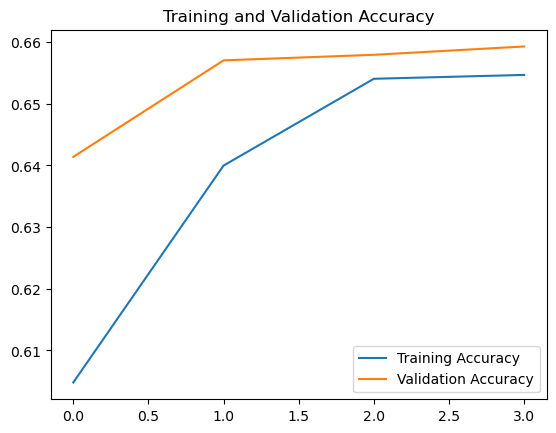

In [9]:
# Plot training and validation accuracy
plt.plot(range(epochs), history["accuracy"], label="Training Accuracy")
plt.plot(range(epochs), history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()

In [10]:
# Evaluate on test data
model.evaluate(test, return_dict=True)

40/40 [==============================] - 2s 44ms/step - loss: 0.6163 - accuracy: 0.6590 - precision: 0.6610 - recall: 0.6530


{'loss': 0.6162513494491577,
 'accuracy': 0.6590499877929688,
 'precision': 0.6609981060028076,
 'recall': 0.652999997138977}

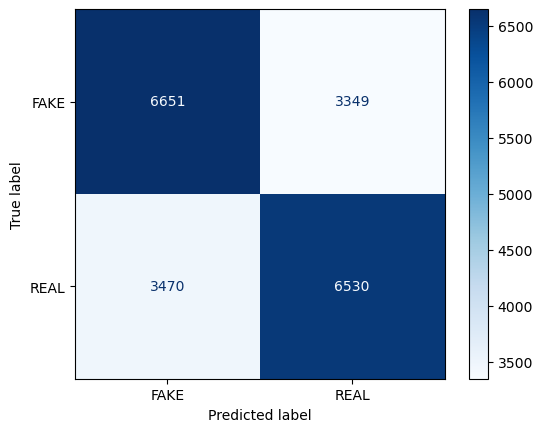

In [11]:
# Confusion matrix
test_predictions = np.array([])
test_labels = np.array([])
for x, y in test:
    test_predictions = np.append(test_predictions, model(x) > 0.5)
    test_labels = np.append(test_labels, y)
ConfusionMatrixDisplay.from_predictions(test_labels, test_predictions, display_labels=classes, cmap="Blues");